In [ ]:
!nvidia-smi

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from sklearn.model_selection import train_test_split
import keras
from keras import Sequential
from keras.applications import resnet_v2
from keras.layers import Dense
from keras.preprocessing import image

In [4]:
brain_df = pd.read_csv('/content/drive/MyDrive/Brain Tumor.csv',usecols=[0,1])
brain_df.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


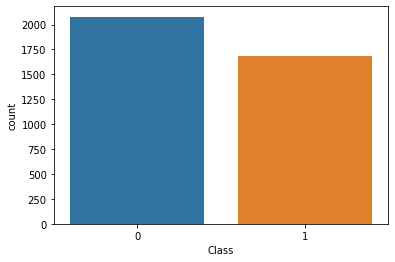

In [5]:
sns.countplot(brain_df['Class'])

In [6]:
path_list = []
base_path = '/content/drive/MyDrive/Brain Tumor/Brain Tumor'
for entry in os.listdir(base_path):
    path_list.append( os.path.join(base_path,entry))

In [7]:
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
brain_df['pathes'] = brain_df['Image'].map(pathes_dict.get)

In [8]:
brain_df.head()

,Image,Class,pathes
0,Image1,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...
1,Image2,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...
2,Image3,1,/content/drive/MyDrive/Brain Tumor/Brain Tumor...
3,Image4,1,/content/drive/MyDrive/Brain Tumor/Brain Tumor...
4,Image5,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...


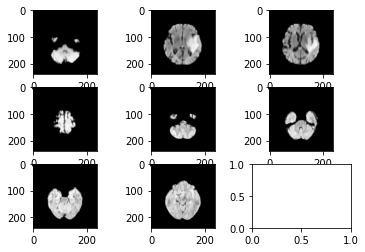

In [9]:
for x in range (0 ,9):
    img = imread(brain_df['pathes'][x])
    plt.imshow(img)
    plt.subplot(3,3,x+1)

In [11]:
from PIL.Image import open
brain_df['pixels']=brain_df['pathes'].map(lambda x:  np.asarray(open(x).resize((224,224))))

0       /content/drive/MyDrive/brain tumor/Brain Tumor...
1       /content/drive/MyDrive/brain tumor/Brain Tumor...
2       /content/drive/MyDrive/brain tumor/Brain Tumor...
3       /content/drive/MyDrive/brain tumor/Brain Tumor...
4       /content/drive/MyDrive/brain tumor/Brain Tumor...
                              ...                        
3757    /content/drive/MyDrive/brain tumor/Brain Tumor...
3758    /content/drive/MyDrive/brain tumor/Brain Tumor...
3759    /content/drive/MyDrive/brain tumor/Brain Tumor...
3760    /content/drive/MyDrive/brain tumor/Brain Tumor...
3761    /content/drive/MyDrive/brain tumor/Brain Tumor...
Name: pathes, Length: 3762, dtype: object

In [12]:
brain_df.head()

,Image,Class,pathes,pixels
0,Image1,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [13]:
image_list = []
for i in range(0,len(brain_df)):
    # load image
    brain_img = brain_df['pixels'][i].astype(np.float32)
    img_array = image.img_to_array(brain_img)
     # append to list of all images
    image_list.append(keras.applications.resnet_v2.preprocess_input(img_array))
    
# convert image list to single array
# Our feature
X = np.array(image_list)

# print shape of X
print(X.shape)

(3762, 224, 224, 3)


In [14]:
y = np.array(brain_df.Class)

In [15]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                ,random_state=0)


print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 224, 224, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 224, 224, 3)
The size of the X_test: 753


In [17]:
num_classes = 1
model = Sequential()
model.add(resnet_v2.ResNet101V2(input_shape=(224, 224, 3),weights="imagenet"
                             ,include_top=False))
model.add(keras.layers.GlobalAveragePooling2D())
model.add( Dense(num_classes, activation='sigmoid',name='preds'))
model.layers[0].trainable= False
# show model summary
model.summary()

171327488/171317808 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
preds (Dense)                (None, 1)                 2049      
Total params: 42,628,609
Trainable params: 2,049
Non-trainable params: 42,626,560
_________________________________________________________________


In [18]:
import tensorflow as tf
model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)


# mock-train the model 
history=model.fit(
    X_train[:,:,:,:],
    y_train[:],
    epochs=200,
    verbose=1,
    validation_data=(X_test[:,:,:,:], y_test[:])
)
model.save("resnet_model101v2_brain.h5")
print("Saved model to disk")

Epoch 1/200
95/95 [==============================] - 79s 481ms/step - loss: 0.5482 - accuracy: 0.7358 - val_loss: 0.4833 - val_accuracy: 0.7822
Epoch 2/200
95/95 [==============================] - 42s 439ms/step - loss: 0.4206 - accuracy: 0.8262 - val_loss: 0.4219 - val_accuracy: 0.8114
Epoch 3/200
95/95 [==============================] - 41s 438ms/step - loss: 0.3809 - accuracy: 0.8508 - val_loss: 0.3932 - val_accuracy: 0.8287
Epoch 4/200
95/95 [==============================] - 41s 438ms/step - loss: 0.3592 - accuracy: 0.8608 - val_loss: 0.3766 - val_accuracy: 0.8327
Epoch 5/200
95/95 [==============================] - 41s 438ms/step - loss: 0.3434 - accuracy: 0.8697 - val_loss: 0.3668 - val_accuracy: 0.8393
Epoch 6/200
95/95 [==============================] - 41s 438ms/step - loss: 0.3319 - accuracy: 0.8757 - val_loss: 0.3830 - val_accuracy: 0.8420
Epoch 7/200
95/95 [==============================] - 41s 438ms/step - loss: 0.3240 - accuracy: 0.8764 - val_loss: 0.3535 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved model to disk


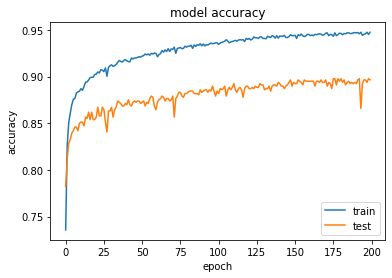

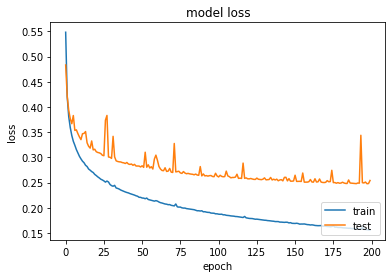

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [20]:
pretrained_cnn = keras.models.load_model('./resnet_model101v2_brain.h5')

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(X_test,y_test)
# print loss score
print('Eval loss:',eval_score[0])
# print accuracy score
print('Eval accuracy:',eval_score[1] )

24/24 [==============================] - 11s 355ms/step - loss: 0.2541 - accuracy: 0.8964
Eval loss: 0.25413814187049866
Eval accuracy: 0.8964143395423889


In [21]:
y_pred = pretrained_cnn.predict(X_test)
y_pred=np.round(y_pred).astype(int)

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Tumor','Tumor']
classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)

{'No Tumor': {'f1-score': 0.8997429305912596,
  'precision': 0.9259259259259259,
  'recall': 0.875,
  'support': 400},
 'Tumor': {'f1-score': 0.8928571428571429,
  'precision': 0.8666666666666667,
  'recall': 0.9206798866855525,
  'support': 353},
 'accuracy': 0.896414342629482,
 'macro avg': {'f1-score': 0.8963000367242013,
  'precision': 0.8962962962962964,
  'recall': 0.8978399433427762,
  'support': 753},
 'weighted avg': {'f1-score': 0.8965149318261293,
  'precision': 0.8981456888495402,
  'recall': 0.896414342629482,
  'support': 753}}

In [23]:
confusion_matrix(y_test , y_pred )

array([[350,  50],
       [ 28, 325]])